Jacob Solomon

Ryan Little

Physics 260 - Final Project

# Optimizing the efficiency of a magnetic propulsion system



## 1. Flat rings on the floor

### Optimizing B-field produced by the tube
parameters to be investigated:

1. arrangement of loops
    a. radius
    b. spacing
    c. side-by-side?
2. current in loops
    a. how much current in each wire (highest field strength to input power ratio)
    b. different amount of current in each wire?
3. TBD
.
.
.


Optimizing: Strength of B-field (MAX), Uniformity of B-field (MAX), Energy required to produce such B-field (MIN)

### Optimizing the force acting on the pod
parameters to be investigated:

1. location of magnetic dipole within B-field

2. multiple dipoles?

## 2. Solenoid tube

parameters TBD



### Import libraries


In [147]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today
import matplotlib as mpl
import matplotlib.cm as cm
import sys as sys

### Function for calculating B-field at a point due to a ring with current

In [159]:
#####  B field function simplified
def Bloop(r_loop,x_pos,y_pos,z_pos,I,x,y,z):
    '''
    Parameters:
    r_loop: the radius of each loop
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    x: x coordinate of point the function is solving for
    y: y coordinate of point the function is solving for
    z: z coordinate of point the function is solving for
    '''
    d_theta = 2*np.pi/100
    theta = np.arange(0, 2*np.pi, d_theta)
    x_loop = r_loop*np.cos(theta) + x_pos
    y_loop = r_loop*np.sin(theta) + y_pos
    
    dl_x = -r_loop * d_theta * np.sin(theta)
    dl_y = r_loop * d_theta * np.cos(theta)
    
    x_sep = x - x_loop
    y_sep = y - y_loop
    z_sep = z - z_pos
    
    mag_rsep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    
    Bx = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_y*z_sep)*mag_rsep**-3)
    By = np.sum((1.2566e-6)/(4*np.pi)*I*(-dl_x*z_sep)*mag_rsep**-3)
    Bz = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_x*y_sep-dl_y*x_sep)*mag_rsep**-3)
    
    return(Bx,By,Bz)

### Function for creating a plane of B-field data in the xz plane

In [120]:
def B_xz_plane(x_min, x_max, z_min, z_max, x_step, z_step, y_value, r_loop, x_pos, y_pos, z_pos, I):
    '''
    parameters:
    x_min: minimum x value of plane
    x_max: maximum x value of plane
    z_min: minimum z value of plane
    z_max: maximum z value of plane
    x_step: distance from each x value to the next
    z_step: distance from each z value to the next
    y_value: y value of xz plane
    R_loop: radius of the ring
    x_pos: x coordinate of ring center
    y_pos: y coordinate of ring center
    z_pos: z coordinate of ring center
    I: how much current is in the ring
    '''
    x_range = np.arange(x_min, x_max, x_step)
    z_range = np.arange(z_min, z_max, z_step)
    
    Bx = np.zeros((np.size(z_range),np.size(x_range)))
    By = np.zeros((np.size(z_range),np.size(x_range)))
    Bz = np.zeros((np.size(z_range),np.size(x_range)))
    
    i = 0
    while(i < np.size(x_range)):
        n = 0
        while(n < np.size(z_range)):
            Bx[n,i], By[n,i], Bz[n,i] = Bloop(r_loop,x_pos,y_pos,z_pos,I,x_range[i],y_value,z_range[n])
            n += 1
        i += 1
    return(Bx, By, Bz)

In [121]:
## define global parameters
x_min = -10
x_max = 10
z_min = -1
z_max = 1
y_value = 0
z_pos = 0

## 1. Flat rings on the floor - Optimizing B-field - spacing of rings in a single line

Radius = 0.5m

arrangement: single line

Current = 100A

### First Iteration
Spacing (center to center) = 1m (no overlap)

for force, Jeff said the force on a dipole equals the cross product of the dipole moment, M, and the B-field
and the dipole of a ring of current equals the magnitude of current times the area vector


FIRST ITERATION


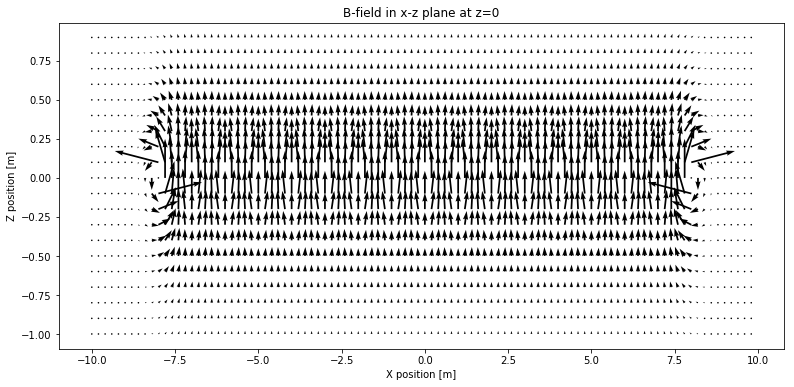

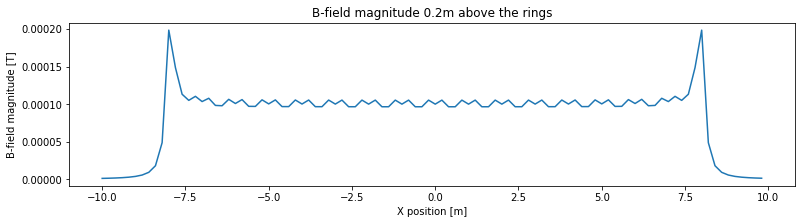

In [122]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
num_rings = 16
spacing = 1
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to solve for the B-field
m = 0
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*250):
            ok[n,i] = 0 
        n += 1
    i += 1
    
## plots    
print "FIRST ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude 0.2m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

RESULTS: the b-field is fairly uniform but could still be a lot better. There is no overlap in this first configuration and we suspect that if the rings overlap the b-field produced will be much more uniform. In the next few iterations we will overlap the rings more and more to see how it affects the b-field.

### Second Iteration
Spacing(center to center) = 0.9m 


SECOND ITERATION


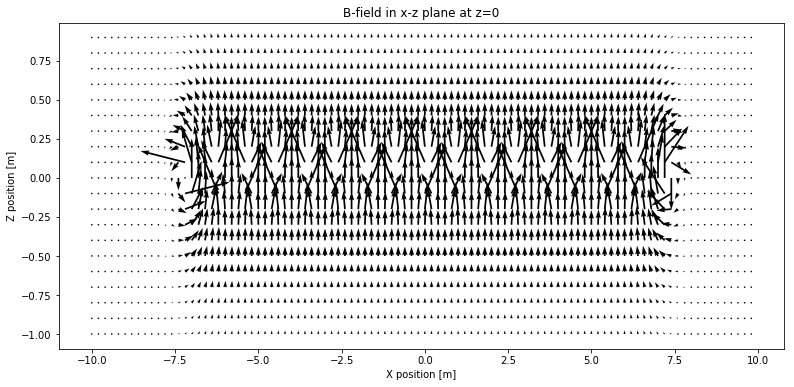

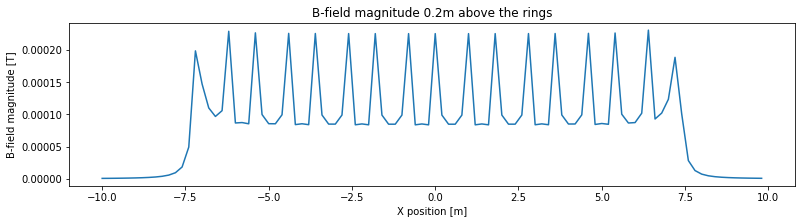

In [123]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 16 # np.floor(x_max*2/R_loop)
spacing = 0.9
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*200000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
print "SECOND ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude 0.2m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

A spacing of 0.9m produces a stronger but more irratic b-field. A uniform B-field is very desirable as it would make the motion of the pod smoother and more controlled. In the next configuration the rings will overlap more.

### Third Iteration
Spacing (center to center) = 0.5m 


THIRD ITERATION


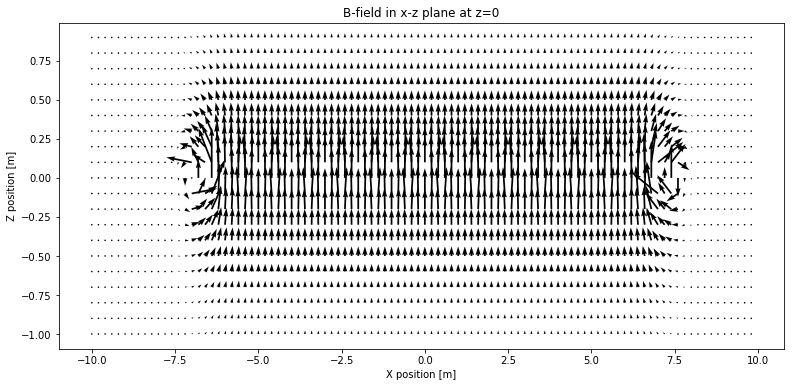

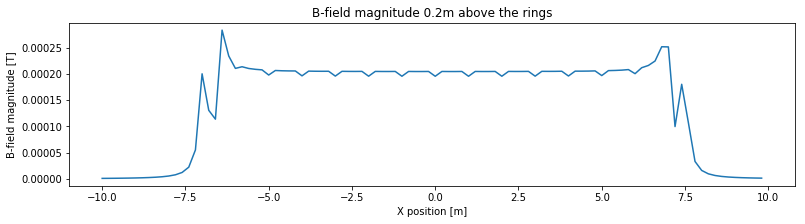

In [124]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 28 # np.floor(x_max*2/R_loop)
spacing = 0.5
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots 
print "THIRD ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude 0.2m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

spacing: 0.5m . 

This B-field is significantly stronger and more uniform than both previous iterations. This shows that overlapping the ringsTo find the sweet spot of how much the rings should overlap we will keep on experimenting.

### Fourth Iteration
Spacing (center to center) = 0.25m


FOURTH ITERATION


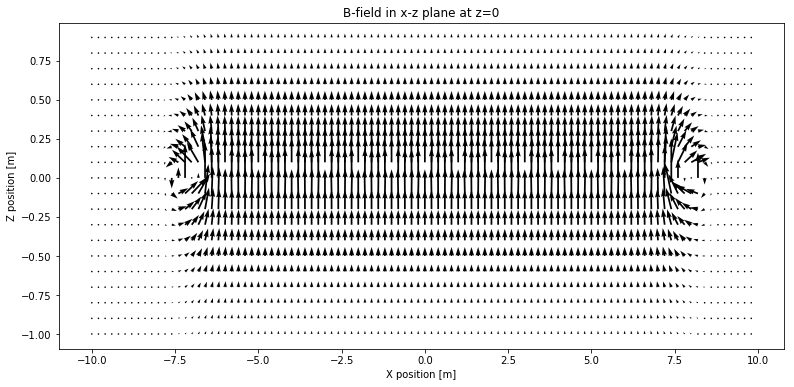

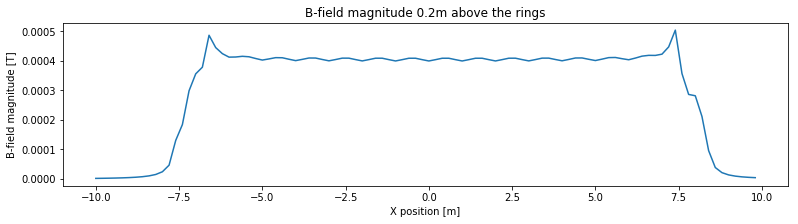

In [125]:
## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to solve for the B-field
m = 0
num_rings = 60 # np.floor(x_max*2/R_loop)
spacing = 0.25
Bx = 0
By = 0
Bz = 0
x_pos = -(num_rings*spacing/2) + R_loop
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    #plt.plot([-1,1],[x_pos,x_pos], linewidth = 4.0, c = 'b')
    x_pos += spacing

## set up for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.min(B_mag)*20000000000):
            ok[n,i] = 0 
        n += 1
    i += 1

## plots    
print "FOURTH ITERATION"

plt.figure(figsize=(13,6))
qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz)
plt.title('B-field in x-z plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

plt.figure(figsize=(13,3))
plt.plot(x_range, B_mag[9, :])
plt.title('B-field magnitude 0.2m above the rings')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('X position [m]')
plt.show()

#### Results

spacing: 0.25m

It seems like as ring spacing decreases the B-field keeps on getting stronger and more uniform, which is good. We'll have to now look at how much input power is required as a function of ring spacing and decide where the optimal balance between the two occurs.

## spacing vs b_field strength
#### this cell will find the average b-field strength 0.2m above the rings as a function of ring spacing 
ring spacing will range from 0.1m to 1m in increments of 0.01m

In [160]:
x_min = -2.5
x_max = 2.5
z_min = -1
z_max = 1
y_value = 0
z_pos = 0

## define local parameters
R_loop = .5
x_pos = 0
y_pos = 0
I = 100
x_step = 0.2
z_step = 0.1

## the while loop that calls the function to solve for the B-field
increments = 100
B_mag_mean = np.zeros(increments)
i = 0
print "iteration number:"
while(i < increments):
    m = 0
    spacing = 0.1 + (i/increments)
    x_pos = x_min - 2*R_loop ## initialize the position of the first ring to the left outside of the x_range, 
                             ## so that the b-field will be uniform for the entirety of the space we are looking at
    num_rings = (-2*x_pos)/spacing ## this creates the right number of rings to span from x_min to x_max with extra space on the sides
    Bx = 0
    By = 0
    Bz = 0
    while(m < num_rings): 
        Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                              x_step, z_step, y_value,R_loop,
                              x_pos,y_pos,z_pos,I)
        Bx += Bx_temp
        By += By_temp
        Bz += Bz_temp
        m += 1 
        x_pos += spacing
    B_mag_temp = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)
    B_mag_mean[i] = np.mean(B_mag_temp[9,:])
    print (i + 1)
    i += 1

iteration number:
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


<function matplotlib.pyplot.show>

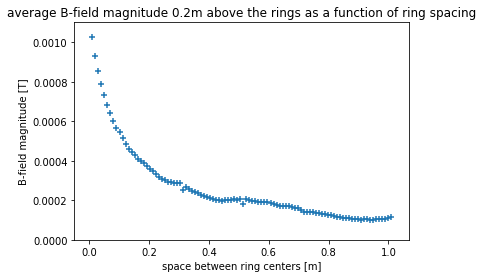

In [162]:
## for plotting
space_range = np.linspace(0.01,1.01,increments)
plt.scatter(space_range,B_mag_mean, marker = "+")
plt.title('average B-field magnitude 0.2m above the rings as a function of ring spacing')
plt.ylabel('B-field magnitude [T]')
plt.xlabel('space between ring centers [m]')
plt.ylim(ymax = 0.00110)
plt.ylim(ymin = 0)
plt.show

This graph shows the rate at which the strength of the b-field above the rings drops off exponentially as the rings become further apart from eachother. Next, we will analyze the power consumption of the track as a function of ring spacing. 

In order to determine how much power the rings consume we will apply the formula P = (I^2)R, and the formula I'm making up right now which is P(total) = P(each-ring)*(# of rings). Assuming that the rings are made up of copper wire with a diameter of 10mm and resistance of 0.000224 ohms/meter, and the rings have radius = 0.5m and current = 100 amps, the power dissipated in each ring equals 7.03 watts. The number of rings over a distance 'L' equals L / (space between each ring's center). Put these two results together and we find that the total power dissipated per meter of track equals (7.03 / space between rings)

In the next kernel we plot both b-field and power consumed by 1m of track as functions of ring spacing.

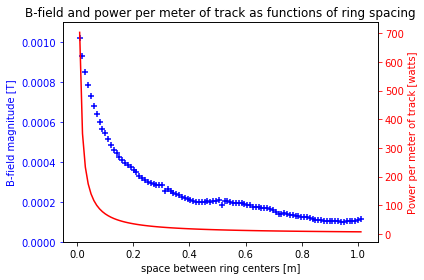

In [174]:
fig, ax1 = plt.subplots()

ax1.scatter(space_range,B_mag_mean, marker = "+", color = 'b')
ax1.set_xlabel('space between ring centers [m]')
ax1.set_ylabel('B-field magnitude [T]', color = 'b')
ax1.set_ylim(ymax = 0.00110)
ax1.set_ylim(ymin = 0)
ax1.tick_params('y', colors='b')
ax1.set_title('B-field and power per meter of track as functions of ring spacing')

ax2 = ax1.twinx()
ax2.plot(space_range,(7.03/space_range), 'r')
ax2.set_ylabel('Power per meter of track [watts]', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## 2. Solenoid Tube
### First Iteration
Parameters (TBD)

#### Calculation

#### Results

And so on...